In [14]:
import numpy as np
import pandas as pd
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.tile_providers import STAMEN_TERRAIN
from bokeh.models import DatetimeTickFormatter

output_notebook()

Loading BokehJS ...

In [2]:
df = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions.csv', parse_dates=[0])

In [70]:
df = df.dropna(subset=['LATITUDE'])
df['KILLED'] = df['NUMBER OF PERSONS KILLED'] + df['NUMBER OF PEDESTRIANS KILLED'] + df['NUMBER OF CYCLIST KILLED'] + df['NUMBER OF MOTORIST KILLED']
df['INJURED'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PEDESTRIANS INJURED'] + df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF MOTORIST INJURED']
df['CASUALTIES'] = np.log1p(df['INJURED'] + np.square(df['KILLED']))
df['ZKILLED'] = (df.KILLED - df.KILLED.min())/(df.KILLED.max()-df.KILLED.min())
df['ZINJURED'] = (df.INJURED - df.INJURED.min()) / (df.INJURED.max()-df.INJURED.min())
df['SPEEDLIMIT'] = 30
df.loc[df.DATE >= '2014-11-07', 'SPEEDLIMIT'] = 25

In [71]:
grouped = df.groupby(pd.Grouper(key='DATE', freq='M')).mean()

In [73]:
p = figure(plot_width=800, plot_height=400, tools="pan,hover,box_select")
p.line(x=grouped.index, y=grouped.ZKILLED, color='red')
p.line(x=grouped.index, y=grouped.ZINJURED, color='green')
p.circle(x=grouped.index, y=grouped.ZKILLED, color='red')
p.circle(x=grouped.index, y=grouped.ZINJURED, color='green')
nov_change = grouped[(grouped.index.month == 11) & (grouped.index.year == 2014)]
p.vbar(width=2, x=nov_change.index, bottom=0, top=0.01)
p.circle(x=nov_change.index, y=nov_change.ZINJURED)
p.circle(x=nov_change.index, y=nov_change.ZKILLED)
p.xaxis[0].formatter = DatetimeTickFormatter(formats=dict(month=["%B %Y"]))
show(p)

/Users/rpostelnik/anaconda3/envs/analysis/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: DatetimeTickFormatter.formats was deprecated in Bokeh 0.12.3 and will be removed, use individual DatetimeTickFormatter fields instead.
  warn(message)


In [51]:
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,KILLED,INJURED,CASUALTIES,ZKILLED,ZINJURED,SPEEDLIMIT
2,2016-09-25,17:09,NaN,NaN,40.841188,-73.932142,"(40.8411882, -73.9321417)",NaN,NaN,NaN,...,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,0,0.000000,-0.032451,-0.389455,25
11,2016-05-15,17:50,BROOKLYN,11217.0,40.684052,-73.977458,"(40.6840525, -73.9774579)",ATLANTIC AVENUE,FLATBUSH AVENUE,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,0,0,0.000000,-0.032451,-0.389455,25
12,2016-05-15,17:55,QUEENS,11354.0,40.764705,-73.810993,"(40.7647053, -73.8109934)",154 STREET,NORTHERN BLVD,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,0,2,1.098612,-0.032451,1.129928,25
13,2016-05-15,17:58,MANHATTAN,10016.0,40.746682,-73.974495,"(40.7466818, -73.9744953)",EAST 37 STREET,2 AVENUE,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,0,0,0.000000,-0.032451,-0.389455,25
14,2016-05-15,18:30,BROOKLYN,11225.0,40.659617,-73.962660,"(40.6596174, -73.9626598)",NaN,NaN,147 OCEAN AVENUE,...,PASSENGER VEHICLE,NaN,NaN,NaN,0,0,0.000000,-0.032451,-0.389455,25
15,2016-04-21,18:58,BROOKLYN,11226.0,40.648402,-73.962875,"(40.6484023, -73.9628751)",EAST 18 STREET,TENNIS COURT,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,0,0,0.000000,-0.032451,-0.389455,25
16,2016-04-21,19:00,NaN,NaN,40.525621,-74.229412,"(40.5256207, -74.229412)",GLEN STREET,NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,0,0,0.000000,-0.032451,-0.389455,25
17,2016-04-21,19:03,BROOKLYN,11204.0,40.633478,-73.978974,"(40.6334775, -73.9789737)",17 AVENUE,42 STREET,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,0,0,0.000000,-0.032451,-0.389455,25
18,2016-04-21,19:10,BROOKLYN,11219.0,40.636353,-73.994318,"(40.636353, -73.994318)",49 STREET,12 AVENUE,NaN,...,NaN,NaN,NaN,NaN,0,2,1.098612,-0.032451,1.129928,25
19,2015-08-25,19:00,NaN,NaN,40.732941,-73.920382,"(40.7329414, -73.9203819)",NaN,NaN,NaN,...,TAXI,NaN,NaN,NaN,0,0,0.000000,-0.032451,-0.389455,25


In [50]:
from pandas.stats.api import ols
ols(y=df.INJURED, x=df['SPEEDLIMIT'])

/Users/rpostelnik/anaconda3/envs/analysis/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         763888
Number of Degrees of Freedom:   2

R-squared:         0.0002
Adj R-squared:     0.0002

Rmse:              1.3162

F-stat (1, 763886):   179.2774, p-value:     0.0000

Degrees of Freedom: model 1, resid 763886

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0081     0.0006      13.39     0.0000     0.0069     0.0093
     intercept     0.2893     0.0167      17.27     0.0000     0.2565     0.3221
---------------------------------End of Summary---------------------------------

In [50]:


background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))
plot_width  = int(750)
plot_height = int(plot_width//1.2)
x_range = (df.LONGITUDE.min(), df.LONGITUDE.max())
y_range = (df.LATITUDE.min(), df.LATITUDE.max())

def base_plot(tools='pan,wheel_zoom,reset,box_zoom',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p

def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df[df.CASUALITIES > 0], 'LONGITUDE', 'LATITUDE', ds.sum('CASUALTIES'))
    img = tf.shade(agg, cmap=Hot, how='log')
    return tf.dynspread(img, threshold=0.5, max_px=4)

p = base_plot(background_fill_color=background)
#p.add_tile(STAMEN_TERRAIN)
export(create_image(x_range, y_range),"NYCT_hot")
InteractiveImage(p, create_image)

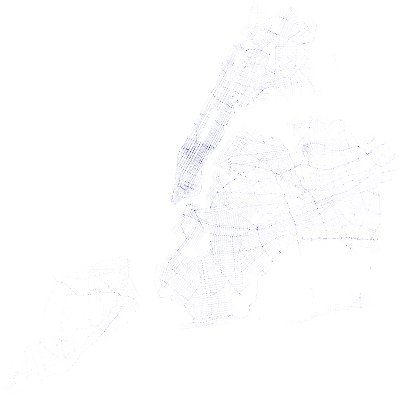

In [15]:
img